# Text Mining & Image Recognition
## Hoja de Trabajo # 2

In [ ]:
# pip install opencv-python

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

import skimage.color
import skimage.io

#### Problema #1:
Desarrolle una función que permita hacer la binarización de una imagen, para realizarlo puede utilizar el enfoque que prefiera.

In [8]:
def binarize_image(image_path, threshold=128, use_otsu=False):
    # Cargar la imagen en escala de grises
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar la binarización con un umbral fijo o con Otsu
    if use_otsu:
        _, binary_img = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    else:
        _, binary_img = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)

    # Mostrar la imagen original y la binarizada
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title("Imagen en escala de grises")
    plt.imshow(img_gray, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.title("Imagen binarizada")
    plt.imshow(binary_img, cmap='gray')
    plt.show()

    # Retornar la imagen binarizada
    return binary_img

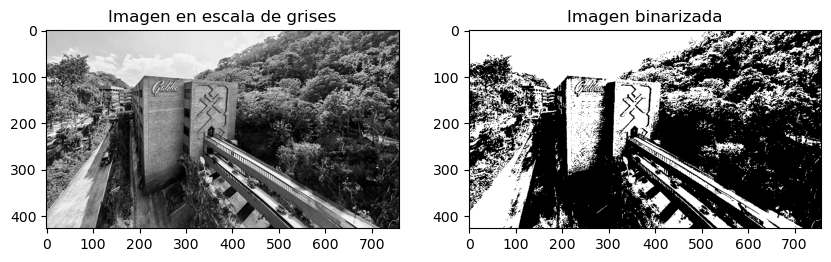

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0]], dtype=uint8)

In [12]:
# Prueba de la función del Problema 1
image_path = 'PF1.jpg'
binarize_image(image_path, threshold=128, use_otsu=True)

#### Problema #2:
Desarrolle una función que dada dos que usted desee del mismo tamaño (igual ancho y alto) y a color, realice las operaciones SUMA, RESTA, AND, OR , XOR con ambas imágenes recuerde que para realizar las operaciones lógicas es necesario pasar la imagen a escala de grises y luego binarizarla.

In [52]:
# Cargar la imagen 1
image_path = 'Imagen A.jpg'
img = cv2.imread(image_path)

# Obtener dimensiones de la imagen
height, width, channels = img.shape
print(f"El tamaño de la imagen es {width}x{height} píxeles y tiene {channels} canales.")

El tamaño de la imagen es 2403x1464 píxeles y tiene 3 canales.


In [54]:
# Cargar la imagen 2
image_path2 = 'Imagen B.jpg'
img2 = cv2.imread(image_path2)

# Obtener dimensiones de la imagen
height, width, channels = img2.shape
print(f"El tamaño de la imagen es {width}x{height} píxeles y tiene {channels} canales.")

El tamaño de la imagen es 5616x3744 píxeles y tiene 3 canales.


In [56]:
# Redimensionar la segunda imagen al tamaño de la primera
img2 = cv2.imread('Imagen B.jpg')
img2_resized = cv2.resize(img2, (width, height))

# Guardar la imagen redimensionada
cv2.imwrite('Imagen B_resized.jpg', img2_resized)

True

In [66]:
def process_images(image_path1, image_path2, threshold=128):
    # Cargar las imágenes a color
    img1 = cv2.imread(image_path1)
    img2 = cv2.imread(image_path2)

    # Obtener el tamaño de la primera imagen
    height, width, _ = img1.shape

    # Redimensionar la segunda imagen al tamaño de la primera
    img2_resized = cv2.resize(img2, (width, height))

    # Verificar que ambas imágenes tengan el mismo tamaño
    if img1.shape != img2_resized.shape:
        print("Las imágenes no tienen el mismo tamaño, incluso después de redimensionar.")
        return

    # --- OPERACIONES ARITMÉTICAS ---
    # Suma
    sum_img = cv2.add(img1, img2_resized)

    # Resta
    sub_img = cv2.subtract(img1, img2_resized)

    # --- OPERACIONES LÓGICAS ---
    # Convertir las imágenes a escala de grises
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)

    # Binarizar las imágenes (threshold manual)
    _, bin_img1 = cv2.threshold(gray1, threshold, 255, cv2.THRESH_BINARY)
    _, bin_img2 = cv2.threshold(gray2, threshold, 255, cv2.THRESH_BINARY)

    # AND
    and_img = cv2.bitwise_and(bin_img1, bin_img2)

    # OR
    or_img = cv2.bitwise_or(bin_img1, bin_img2)

    # XOR
    xor_img = cv2.bitwise_xor(bin_img1, bin_img2)

    # --- VISUALIZACIÓN ---
    plt.figure(figsize=(12,8))

    # Mostrar las imágenes originales
    plt.subplot(3, 3, 1)
    plt.title("Imagen 1")
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 3, 2)
    plt.title("Imagen 2 (Redimensionada)")
    plt.imshow(cv2.cvtColor(img2_resized, cv2.COLOR_BGR2RGB))

    # Mostrar resultados de operaciones aritméticas
    plt.subplot(3, 3, 3)
    plt.title("Suma")
    plt.imshow(cv2.cvtColor(sum_img, cv2.COLOR_BGR2RGB))

    plt.subplot(3, 3, 4)
    plt.title("Resta")
    plt.imshow(cv2.cvtColor(sub_img, cv2.COLOR_BGR2RGB))

    # Mostrar resultados de operaciones lógicas
    plt.subplot(3, 3, 5)
    plt.title("AND")
    plt.imshow(and_img, cmap='gray')

    plt.subplot(3, 3, 6)
    plt.title("OR")
    plt.imshow(or_img, cmap='gray')

    plt.subplot(3, 3, 7)
    plt.title("XOR")
    plt.imshow(xor_img, cmap='gray')

    plt.tight_layout()
    plt.show()

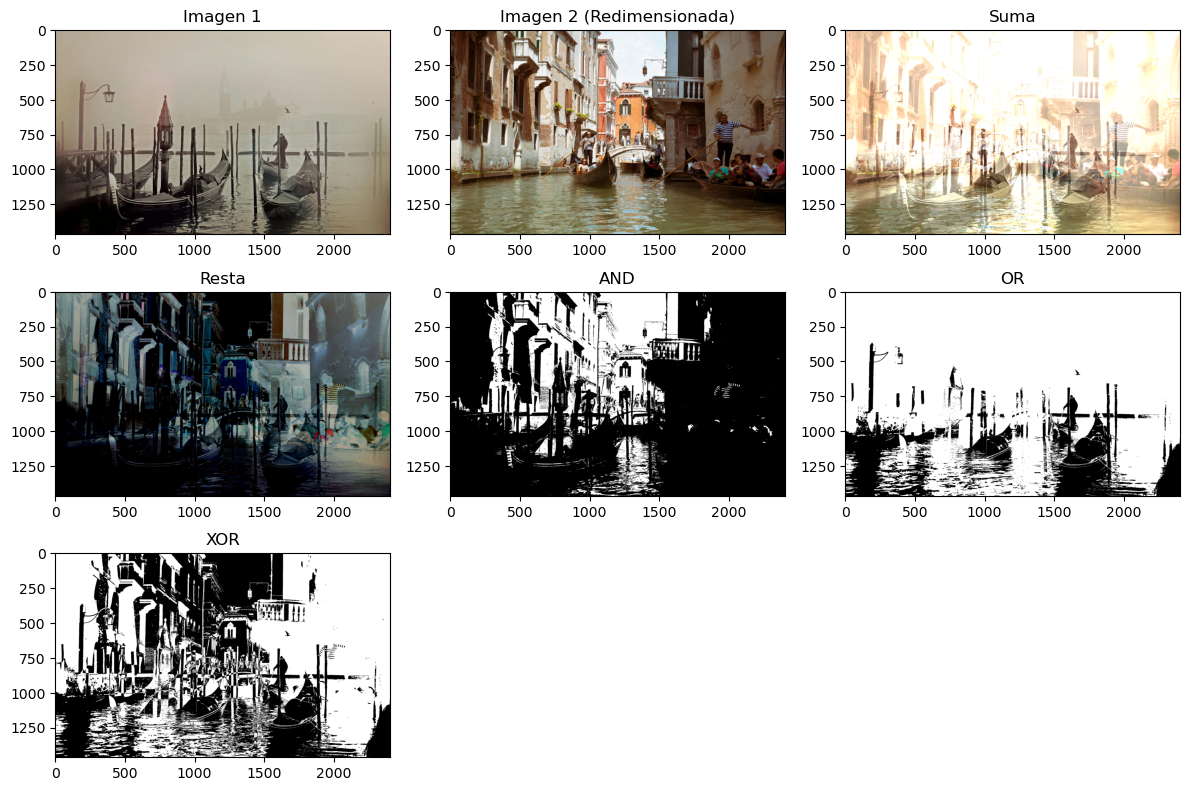

In [70]:
# Prueba de la función con las imágenes redimensionadas
image_path1 = 'Imagen A.jpg'
image_path2 = 'Imagen B.jpg'
process_images(image_path1, image_path2, threshold=128)

#### Problema #3:
Desarrolle una función que dada una imagen en escala de grises muestre dicha imagen en 3 dimensiones, donde los ejes X e Y representan el dominio espacial de la imagen y Z representa la intensidad del color gris de cada pixel.

In [74]:
from mpl_toolkits.mplot3d import Axes3D

def display_image_in_3D(image_path):
    # Cargar la imagen en escala de grises
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Obtener las dimensiones de la imagen
    height, width = img_gray.shape

    # Crear una malla de coordenadas para los ejes X e Y
    X, Y = np.meshgrid(np.arange(0, width), np.arange(0, height))

    # Crear la figura 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Mostrar la imagen en 3D usando la intensidad de cada pixel en el eje Z
    ax.plot_surface(X, Y, img_gray, cmap='gray')

    # Etiquetas de los ejes
    ax.set_xlabel('Eje X (Ancho)')
    ax.set_ylabel('Eje Y (Alto)')
    ax.set_zlabel('Intensidad de gris (Z)')

    # Mostrar el gráfico
    plt.show()

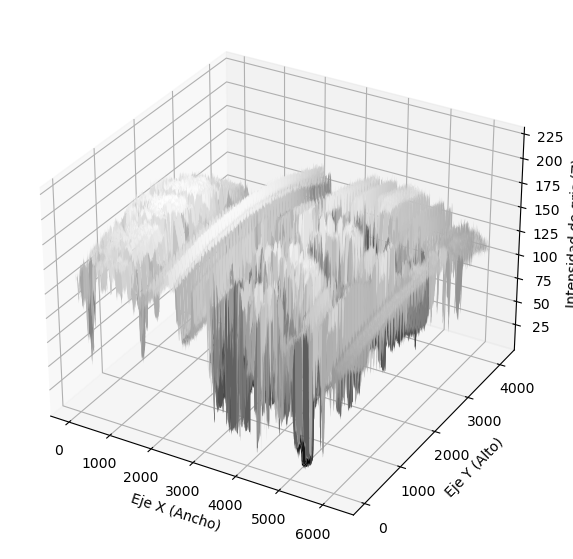

In [82]:
# Prueba de la función con una imagen en escala de grises
image_path = 'Grises.jpg'
display_image_in_3D(image_path)

#### Problema #4:
Implemente una función para cada una de las transformaciones vistas en clase: negativa, lineal, logarítmica y exponencial.

In [86]:
# Función para la transformación negativa
def negative_image(img_gray):
    return 255 - img_gray

# Función para la transformación lineal
def linear_transform(img_gray, alpha=1.2, beta=30):
    # alpha controla el contraste y beta controla el brillo
    return cv2.convertScaleAbs(img_gray, alpha=alpha, beta=beta)

# Función para la transformación logarítmica
def logarithmic_transform(img_gray, c=1):
    img_log = c * np.log1p(img_gray)  # log(1 + pixel) para evitar log(0)
    img_log = np.clip(img_log, 0, 255)  # Clipping para evitar valores fuera de rango
    return np.uint8(img_log)

# Función para la transformación exponencial
def exponential_transform(img_gray, gamma=0.5):
    img_exp = np.power(img_gray / 255.0, gamma)  # Normalizar entre 0 y 1
    img_exp = np.clip(img_exp * 255, 0, 255)  # Escalar de vuelta a [0, 255]
    return np.uint8(img_exp)

# Función para mostrar todas las transformaciones
def apply_transformations(image_path):
    # Cargar la imagen en escala de grises
    img_gray = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Aplicar las transformaciones
    negative_img = negative_image(img_gray)
    linear_img = linear_transform(img_gray)
    log_img = logarithmic_transform(img_gray)
    exp_img = exponential_transform(img_gray)

    # Mostrar las imágenes originales y transformadas
    plt.figure(figsize=(12, 8))

    # Imagen original
    plt.subplot(2, 3, 1)
    plt.title("Imagen original")
    plt.imshow(img_gray, cmap='gray')

    # Imagen negativa
    plt.subplot(2, 3, 2)
    plt.title("Negativa")
    plt.imshow(negative_img, cmap='gray')

    # Transformación lineal
    plt.subplot(2, 3, 3)
    plt.title("Transformación Lineal")
    plt.imshow(linear_img, cmap='gray')

    # Transformación logarítmica
    plt.subplot(2, 3, 4)
    plt.title("Transformación Logarítmica")
    plt.imshow(log_img, cmap='gray')

    # Transformación exponencial
    plt.subplot(2, 3, 5)
    plt.title("Transformación Exponencial")
    plt.imshow(exp_img, cmap='gray')

    plt.tight_layout()
    plt.show()

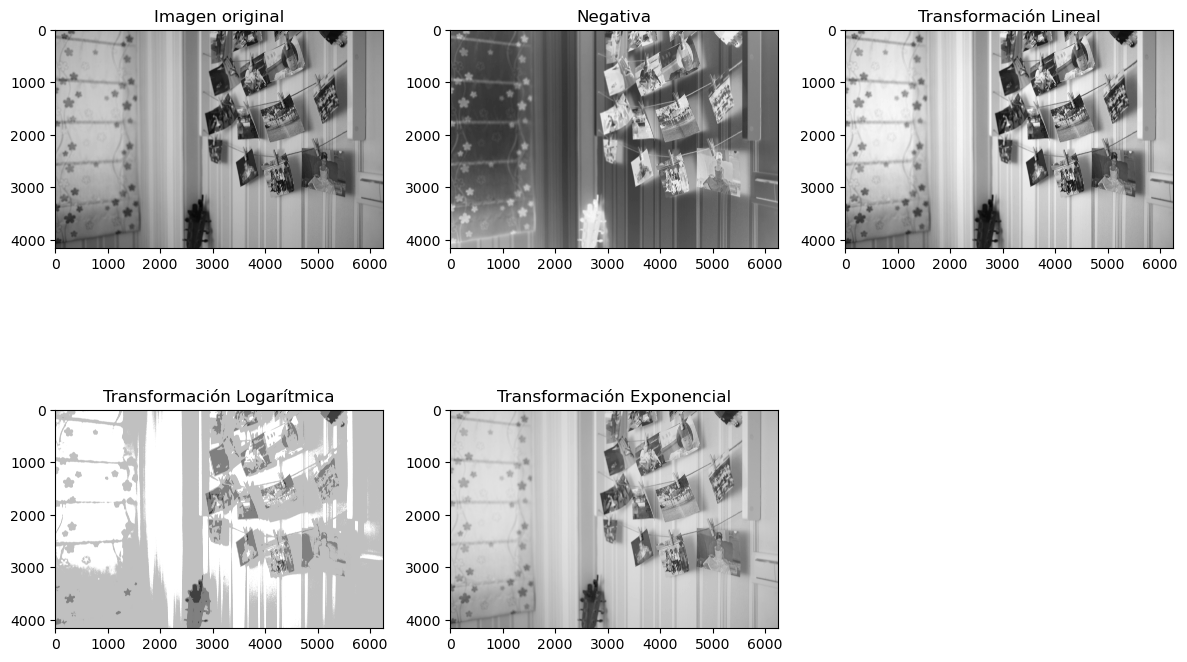

In [88]:
# Prueba de la función con la imagen Grises.jpg
image_path = 'Grises.jpg'
apply_transformations(image_path)

#### Problema #5:
Investigue que hace el kernel Laplaciano y como este enfoque se diferencia de usar el algoritmo de Canny para la detección de bordes.

# Problema #5: Investigación sobre el Kernel Laplaciano y la Detección de Bordes de Canny

## Kernel Laplaciano

El **Laplaciano** es un operador diferencial de segundo orden que calcula la segunda derivada de una imagen. En términos simples, este operador mide cómo cambia rápidamente la intensidad de píxeles en una imagen, lo que ayuda a detectar bordes. Los bordes son áreas donde la intensidad cambia bruscamente. 

El **kernel Laplaciano** es una matriz pequeña que se utiliza para convolucionar una imagen y resaltar las áreas donde las variaciones de intensidad son más grandes. Un kernel típico Laplaciano en 2D es:

0   1   0

1  -4   1

0   1   0

Este kernel detecta tanto bordes horizontales como verticales. El **Laplaciano** es isotrópico, lo que significa que detecta bordes en todas direcciones, a diferencia de otros operadores como **Sobel**, que solo lo hacen en una dirección específica.

## Ventajas del Kernel Laplaciano:
- Sencillo de implementar.
- Detecta bordes en todas direcciones de forma simultánea.
- Es útil para detectar regiones de cambio rápido en la intensidad de la imagen.

## Desventajas:
- Debido a que se basa en la segunda derivada, es muy sensible al **ruido** en la imagen. Cualquier pequeño cambio en la intensidad del píxel puede producir un borde falso.
- No distingue entre bordes débiles y fuertes, lo que puede hacer que algunos bordes importantes no se destaquen lo suficiente.

---

## Detección de Bordes con el Algoritmo de Canny

La **detección de bordes de Canny** es un método mucho más sofisticado que combina múltiples etapas para identificar bordes de manera más precisa y robusta. Las principales etapas del algoritmo de Canny son:

1. **Filtrado Gaussiano**: Suaviza la imagen para reducir el ruido, haciendo que los bordes detectados sean más precisos.
2. **Cálculo del Gradiente**: Utiliza las derivadas para identificar las áreas donde los cambios en la intensidad son más pronunciados.
3. **Supresión no máxima**: Refina los bordes encontrados eliminando los que no son máximos locales.
4. **Histéresis**: Utiliza dos umbrales para distinguir entre bordes fuertes y débiles, conectando bordes débiles solo si están asociados con bordes fuertes.

## Ventajas del Algoritmo de Canny:
- Detecta bordes con gran precisión y es menos sensible al ruido gracias al suavizado inicial con un filtro Gaussiano.
- Usa **histéresis** para distinguir entre bordes importantes y ruido, lo que ayuda a evitar la detección de bordes falsos.
- Es capaz de localizar bordes fuertes y conectarlos de manera coherente.

## Desventajas:
- Es más **complejo** y computacionalmente más caro en comparación con el kernel Laplaciano.
- Los parámetros como los **umbrales** y el tamaño del filtro gaussiano deben ajustarse correctamente para obtener buenos resultados, lo que puede requerir ajuste manual.

---

## Comparación entre Kernel Laplaciano y Detección de Bordes de Canny

| Característica                  | Kernel Laplaciano            | Detección de Bordes de Canny  |
|----------------------------------|------------------------------|-------------------------------|
| **Ruido**                        | Muy sensible al ruido         | Reduce el ruido con filtrado   |
| **Precisión de detección**       | Detecta bordes en todas direcciones, pero sin mucha precisión | Detecta bordes precisos con histéresis y supresión no máxima |
| **Complejidad**                  | Simple y rápido               | Más complejo y lento debido a las múltiples etapas |
| **Diferenciación entre bordes**  | No distingue entre bordes fuertes y débiles | Diferencia entre bordes fuertes y débiles con umbrales |
| **Robustez ante ruido**          | Baja                          | Alta debido al filtrado Gaussiano |

---

## ¿Cuándo usar cada enfoque?
- Si necesitas un método rápido y simple para la detección de bordes y el ruido no es un problema grave, el **Kernel Laplaciano** es una buena opción.
- Si necesitas bordes precisos y estás dispuesto a lidiar con un mayor costo computacional, el **Algoritmo de Canny** es ideal, ya que produce bordes más refinados y robustos.a que produce bordes más refinados y robustos.
